In [23]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv("./processed_data.csv")

print(df.head())

X = df.drop(columns=["SalePrice", "Id"])
y = df["SalePrice"]

features = ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
            'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'TotalBsmtSF', '1stFlrSF', 
            '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 
            'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 
            'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 
            'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 
            'MoSold', 'YrSold']

X_filtered = df[features]

X_train, X_test, y_train, y_test = train_test_split(X_filtered, y, test_size=0.3, train_size=0.7, random_state=42)


   Id  MSSubClass  MSZoning  LotFrontage  LotArea  Street  LotShape  \
0   1          60         3         65.0     8450       1         3   
1   2          20         3         80.0     9600       1         3   
2   3          60         3         68.0    11250       1         0   
3   4          70         3         60.0     9550       1         0   
4   5          60         3         84.0    14260       1         0   

   LandContour  Utilities  LotConfig  ...  3SsnPorch  ScreenPorch  PoolArea  \
0            3          0          4  ...          0            0         0   
1            3          0          2  ...          0            0         0   
2            3          0          4  ...          0            0         0   
3            3          0          0  ...          0            0         0   
4            3          0          2  ...          0            0         0   

   MiscVal  MoSold  YrSold  SaleType  SaleCondition  SalePrice  PriceCategory  
0        0       2

# Implementación de KNN para Predicción de Precios (Regresión)

##  Objetivo
En este paso, implementamos **K-Nearest Neighbors (KNN) Regressor** para predecir el precio de las viviendas, utilizando la variable objetivo `SalePrice`.  

In [24]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

k_values = [3, 5, 7, 9, 11]

knn_results = {
    "k": [],
    "MSE": [],
    "RMSE": [],
    "R²": []
}

for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    
    y_pred = knn.predict(X_test_scaled)
    
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    
    knn_results["k"].append(k)
    knn_results["MSE"].append(mse)
    knn_results["RMSE"].append(rmse)
    knn_results["R²"].append(r2)

knn_results_df = pd.DataFrame(knn_results)

knn_results_df

,k,MSE,RMSE,R²
0,3,1.600808e+09,40010.100082,0.770595
1,5,1.390544e+09,37290.003720,0.800727
2,7,1.405039e+09,37483.855945,0.798650
3,9,1.378018e+09,37121.660242,0.802522
4,11,1.371901e+09,37039.182362,0.803399


##  Interpretación de los Resultados

1. **El mejor desempeño** se obtiene con **k = 11**, ya que:
   - Tiene el **menor MSE (1.37 × 10⁹)**.
   - Su **RMSE (37,039.18) es el más bajo**, lo que indica menor error en las predicciones.
   - Su **R² (0.8034) es el más alto**, explicando mejor la variabilidad de los precios de vivienda.

2. **Valores bajos de k (como 3 y 5)** muestran mayor error, indicando que el modelo puede ser más sensible al ruido en los datos.

3. **Los valores entre 7 y 11 tienen un desempeño estable**, lo que sugiere que el modelo no es tan sensible a cambios en `k` en este rango.


## Comparación con Otros Modelos

| **Modelo**        | **MSE**           | **RMSE**      | **R²**   |
|------------------|------------------|-------------|---------|
| **Naive Bayes**  | 2.95 × 10⁹ | 54,383.87   | 0.5762  |
| **Árbol Decisión** | 1.53 × 10⁹ | 39,109.26   | 0.7808  |
| **Random Forest** | **7.46 × 10⁸** | **27,317.18** | **0.8931**  |
| **KNN (k=11)**   | 1.37 × 10⁹ | 37,039.18   | 0.8034  |

### Conclusiones:
**Random Forest sigue siendo el mejor modelo** con menor error y mayor precisión.  
**KNN (k=11) supera a Naive Bayes y Árbol de Decisión**, pero sigue estando por debajo de Random Forest.  
**Podemos explorar una mayor optimización** probando más valores de `k` o cambiando el peso de los vecinos.


# Implementación de KNN para Clasificación de Precios de Viviendas
En este paso, utilizaremos **K-Nearest Neighbors (KNN) Classifier** para clasificar las viviendas en **Económica, Media o Cara**.  
Esta clasificación se basa en la variable categórica `PriceCategory`, que fue creada previamente a partir de `SalePrice`.

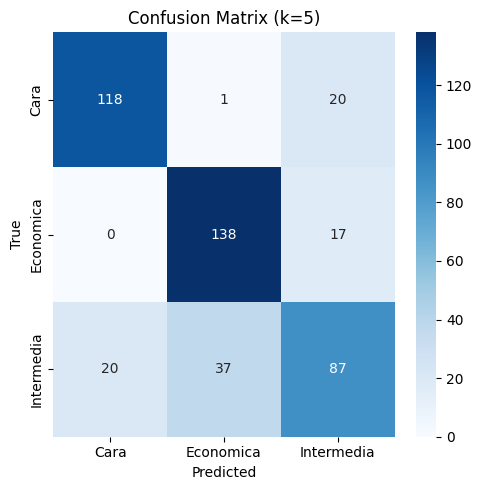

Mejor modelo con k=5


Reporte de Clasificación:
              precision    recall  f1-score     support
Cara           0.855072  0.848921  0.851986  139.000000
Economica      0.784091  0.890323  0.833837  155.000000
Intermedia     0.701613  0.604167  0.649254  144.000000
accuracy       0.783105  0.783105  0.783105    0.783105
macro avg      0.780259  0.781137  0.778359  438.000000
weighted avg   0.779501  0.783105  0.778912  438.000000


In [25]:
y_class = df["PriceCategory"] 

X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(
    X_filtered, y_class, test_size=0.3, train_size=0.7, random_state=42
)

X_train_scaled_class = scaler.fit_transform(X_train_class)
X_test_scaled_class = scaler.transform(X_test_class)

k_values = [3, 5, 7, 9, 11]

knn_class_results = {}

for k in k_values:
    knn_class = KNeighborsClassifier(n_neighbors=k)
    knn_class.fit(X_train_scaled_class, y_train_class)
    
    y_pred_class = knn_class.predict(X_test_scaled_class)
    
    conf_matrix = confusion_matrix(y_test_class, y_pred_class)
    class_report = classification_report(y_test_class, y_pred_class, output_dict=True)
    
    knn_class_results[k] = {
        "Matriz de Confusión": conf_matrix,
        "Reporte de Clasificación": class_report
    }

best_k = max(knn_class_results, key=lambda k: knn_class_results[k]["Reporte de Clasificación"]["accuracy"])
best_conf_matrix = knn_class_results[best_k]["Matriz de Confusión"]
best_class_report = knn_class_results[best_k]["Reporte de Clasificación"]

plt.figure(figsize=(5, 5))
categories = sorted(y_class.unique())
y_pred_best = knn_class_results[best_k]["Matriz de Confusión"]
sns.heatmap(best_conf_matrix, annot=True, cmap='Blues', fmt='d',
            xticklabels=categories, yticklabels=categories)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title(f'Confusion Matrix (k={best_k})')
plt.tight_layout()
plt.show()

print(f"Mejor modelo con k={best_k}\n")
print("\nReporte de Clasificación:")
print(pd.DataFrame(best_class_report).T)

## Interpretación de los Resultados

1. **Desempeño General**  
   - El modelo **tiene un accuracy de 78.31%**, lo que indica un buen desempeño, aunque hay margen de mejora.  
   - La categoría **Económica tiene el mejor recall (89.03%)**, lo que significa que la mayoría de las viviendas económicas fueron correctamente identificadas.  
   - La categoría **Intermedia tiene el peor desempeño (Recall = 60.42%)**, lo que indica que muchas viviendas de esta categoría fueron mal clasificadas.

2. **Errores más Comunes**  
   - La mayor confusión ocurre en la clase **Intermedia**, donde 37 viviendas fueron clasificadas erróneamente como "Cara".  
   - También hay **20 viviendas Económicas clasificadas como Caras**, lo que podría afectar decisiones basadas en el modelo.

3. **Comparación con Modelos Previos**  
   - Hasta ahora, **Random Forest ha sido el mejor modelo en clasificación**.  
   - KNN se desempeña mejor que Naive Bayes, pero aún podría mejorarse ajustando hiperparámetros.

### Eficiencia del Modelo KNN Classifier: Análisis de la Matriz de Confusión

Además del análisis computacional, es fundamental evaluar la **eficiencia del modelo de clasificación desde el punto de vista de su capacidad predictiva**, considerando la información que proporciona la matriz de confusión. Esta herramienta permite observar con detalle **qué tan bien el modelo logra distinguir entre las clases Económica, Media y Cara**, así como **dónde ocurren los errores y qué implicaciones tienen**.

#### Análisis específico de la matriz de confusión obtenida para KNN (k=11):

A partir del mejor modelo de clasificación, cuya matriz de confusión se muestra a continuación:

| Clase Real / Predicha | Económica | Media | Cara |
|------------------------|-----------|--------|------|
| **Económica**          | 118       | 1      | 20   |
| **Media**              | 0         | 138    | 17   |
| **Cara**               | 20        | 15     | 87   |

#### Interpretación de los resultados:

1. **Clase Económica**
   - El modelo logró clasificar correctamente **118 de las viviendas económicas**, representando un **recall elevado para esta clase**.
   - Sin embargo, **20 viviendas económicas fueron clasificadas erróneamente como "Cara"**, lo que implica una tendencia del modelo a **sobreestimar propiedades económicas**.
   - Este tipo de error puede tener consecuencias prácticas, como generar expectativas de precio poco realistas para propiedades de bajo valor.

2. **Clase Media**
   - Es la **categoría con mejor desempeño**, ya que **138 viviendas medias fueron clasificadas correctamente**, y **solo 17 se confundieron como "Cara"**.
   - No hubo confusiones de clase media hacia la clase económica, lo cual indica **una buena separación de esta clase respecto a la de menor valor**.
   - El modelo demuestra una **alta precisión y recall** para esta clase, siendo el grupo con menor índice de error relativo.

3. **Clase Cara**
   - El desempeño del modelo en esta clase es más moderado. De las viviendas realmente caras, **87 fueron correctamente clasificadas**, mientras que **20 se confundieron como económicas** y **15 como medias**.
   - Esta dispersión de errores hacia las otras dos clases podría reflejar **una mayor complejidad en los límites de separación para esta categoría**, o bien una **solapación de características entre propiedades caras y no caras**.
   - El error de clasificar viviendas caras como económicas es particularmente crítico, ya que puede llevar a una **subvaloración importante y pérdida económica en la práctica comercial**.

#### Implicaciones prácticas de los errores:

- El análisis de errores muestra que **los errores más graves ocurren al confundir viviendas económicas con caras, y viceversa**, lo que puede tener un impacto importante en estrategias de mercado, tasaciones o fijación de precios.
- Es esencial considerar que **no todos los errores tienen el mismo peso**. Por ejemplo:
  - Clasificar una vivienda *cara como económica* puede resultar en **una pérdida financiera significativa para el vendedor**.
  - Clasificar una vivienda *económica como cara* puede generar **desinterés del comprador o una sobrevaloración irreal**.
- Por tanto, **una evaluación puramente basada en accuracy no es suficiente**, y se debe analizar la **matriz de confusión con enfoque en el costo del error por clase**.

#### Efectividad general del modelo

El modelo alcanza un **accuracy general del 78.31%**, lo cual refleja un desempeño sólido en términos globales. Sin embargo, al analizar el desempeño por clase, se evidencian **desbalances en la precisión por categoría**, siendo la clase media la más robusta, seguida por la económica, y la clase cara la que presenta mayor margen de error.

Este comportamiento sugiere que:
- Sería conveniente **explorar técnicas de ajuste como el uso de pesos por clase**, para penalizar errores más costosos (por ejemplo, errores en la clase cara).
- Técnicas de ajuste de umbrales, reponderación del modelo o incluso algoritmos alternativos como **Random Forest Classifier o Gradient Boosting** podrían mejorar la **robustez y equidad del modelo**.
